### Importación de datos



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [2]:
!pip install numerize

  Preparing metadata (setup.py) ... done
  Created wheel for numerize: filename=numerize-0.12-py3-none-any.whl size=3153 sha256=d5674ffb02656a6ab9d1d2b8df97a1a53508d457b752ad2512f6f5faad328776
  Stored in directory: /root/.cache/pip/wheels/6a/49/3e/5375462d832133c3684a27f9ad763a61141a802aee4bd445d6
Successfully built numerize


In [3]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 57.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=509a0c394fc08cbc7c0598ac4b0f8c1bd69c973ca86f36a6906624b6c984b473
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [4]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [5]:
tienda.shape

(2359, 12)

In [6]:
tienda['Tienda'] = '1'
tienda2['Tienda'] = '2'
tienda3['Tienda'] = '3'
tienda4['Tienda'] = '4'

In [7]:
tienda['Total'] = tienda['Costo de envío'] + tienda['Precio']
tienda2['Total'] = tienda2['Costo de envío'] + tienda2['Precio']
tienda3['Total'] = tienda3['Costo de envío'] + tienda3['Precio']
tienda4['Total'] = tienda4['Costo de envío'] + tienda4['Precio']

In [8]:
frames = [tienda, tienda2, tienda3, tienda4]

In [9]:
tiendas_df = pd.concat(frames)

In [10]:
tiendas_df.head(3)

Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   

       Método de pago  Cantidad de cuotas       lat       lon Tienda     Total  
0  Tarjeta de crédito                   8   4.60971 -74.08175      1  171200.0  
1  Tarjeta de crédito                   4   6.25184 -75.56359      1  200700.0  
2  Tarjeta de crédito                   1  10.39972 -75.51444      1  225500.0

In [11]:
# En Google Colab ejecuta esta celda una sola vez. Después de instalar y reiniciar
# la sesión puedes comentar esta linea.
from ydata_profiling import ProfileReport
profile=ProfileReport(tiendas_df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:01<00:00, 12.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Analisis Tienda 1

In [12]:
tienda.describe()

Precio  Costo de envío  Calificación  Cantidad de cuotas  \
count  2.359000e+03     2359.000000   2359.000000         2359.000000   
mean   4.878679e+05    26018.609580      3.976685            2.943196   
std    6.146868e+05    32860.001783      1.415370            2.819897   
min    7.600000e+03        0.000000      1.000000            1.000000   
25%    5.575000e+04     3100.000000      3.000000            1.000000   
50%    2.353000e+05    12400.000000      5.000000            1.000000   
75%    6.781000e+05    36000.000000      5.000000            4.000000   
max    2.977000e+06   160800.000000      5.000000           24.000000   

               lat          lon         Total  
count  2359.000000  2359.000000  2.359000e+03  
mean      5.365283   -74.789417  5.138865e+05  
std       2.287445     1.217827  6.474782e+05  
min      -4.215280   -77.281110  7.600000e+03  
25%       4.609710   -75.563590  5.865000e+04  
50%       4.609710   -74.199040  2.483000e+05  
75%       6.251840   -74.081750  7.137000e+05  
max      11.544440   -67.923900  3.135800e+06

In [13]:
tienda.head(1)

Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   

  Fecha de Compra     Vendedor Lugar de Compra  Calificación  \
0      16/01/2021  Pedro Gomez          Bogotá             4   

       Método de pago  Cantidad de cuotas      lat       lon Tienda     Total  
0  Tarjeta de crédito                   8  4.60971 -74.08175      1  171200.0

# Analisis Tienda 2

In [14]:
tienda2.describe()

Precio  Costo de envío  Calificación  Cantidad de cuotas  \
count  2.359000e+03     2359.000000   2359.000000         2359.000000   
mean   4.732274e+05    25216.235693      4.037304            2.902501   
std    5.955595e+05    31741.375166      1.356153            2.848416   
min    7.600000e+03        0.000000      1.000000            1.000000   
25%    5.455000e+04     2900.000000      4.000000            1.000000   
50%    2.182000e+05    11600.000000      5.000000            1.000000   
75%    6.777000e+05    35450.000000      5.000000            4.000000   
max    2.953400e+06   162500.000000      5.000000           24.000000   

               lat          lon         Total  
count  2359.000000  2359.000000  2.359000e+03  
mean      5.499753   -74.742963  4.984437e+05  
std       2.351118     1.185997  6.272315e+05  
min      -4.215280   -77.281110  8.100000e+03  
25%       4.609710   -75.563590  5.760000e+04  
50%       4.609710   -74.199040  2.292000e+05  
75%       6.251840   -74.081750  7.128000e+05  
max      11.544440   -67.923900  3.108800e+06

In [15]:
tienda2.head(1)

Producto Categoría del Producto    Precio  Costo de envío  \
0  Silla de oficina                Muebles  283600.0         15300.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      04/08/2021  Izabela de León        Medellín             1   

  Método de pago  Cantidad de cuotas      lat       lon Tienda     Total  
0          Nequi                   1  6.25184 -75.56359      2  298900.0

# Analisis Tienda 3

In [16]:
tienda3.describe()

Precio  Costo de envío  Calificación  Cantidad de cuotas  \
count  2.359000e+03     2359.000000   2359.000000         2359.000000   
mean   4.654598e+05    24805.680373      4.048326            2.967783   
std    5.806434e+05    30945.889626      1.386426            2.812153   
min    7.600000e+03        0.000000      1.000000            1.000000   
25%    5.740000e+04     3100.000000      4.000000            1.000000   
50%    2.263000e+05    11900.000000      5.000000            2.000000   
75%    6.660500e+05    34950.000000      5.000000            4.000000   
max    2.968200e+06   158400.000000      5.000000           24.000000   

               lat          lon         Total  
count  2359.000000  2359.000000  2.359000e+03  
mean      5.437076   -74.733463  4.902655e+05  
std       2.405272     1.224572  6.115222e+05  
min      -4.215280   -77.281110  7.800000e+03  
25%       4.609710   -75.563590  6.085000e+04  
50%       4.609710   -74.199040  2.390000e+05  
75%       6.251840   -74.081750  7.014500e+05  
max      11.544440   -67.923900  3.126600e+06

In [17]:
tienda3.head(1)

Producto Categoría del Producto     Precio  Costo de envío  \
0  Secadora de ropa      Electrodomésticos  1285100.0         66600.0   

  Fecha de Compra       Vendedor Lugar de Compra  Calificación  \
0      17/12/2021  Camila Rivera     Santa Marta             4   

       Método de pago  Cantidad de cuotas       lat       lon Tienda  \
0  Tarjeta de crédito                   4  11.24079 -74.19904      3   

       Total  
0  1351700.0

# Analisis Tienda 4

In [18]:
tienda3.describe()

Precio  Costo de envío  Calificación  Cantidad de cuotas  \
count  2.359000e+03     2359.000000   2359.000000         2359.000000   
mean   4.654598e+05    24805.680373      4.048326            2.967783   
std    5.806434e+05    30945.889626      1.386426            2.812153   
min    7.600000e+03        0.000000      1.000000            1.000000   
25%    5.740000e+04     3100.000000      4.000000            1.000000   
50%    2.263000e+05    11900.000000      5.000000            2.000000   
75%    6.660500e+05    34950.000000      5.000000            4.000000   
max    2.968200e+06   158400.000000      5.000000           24.000000   

               lat          lon         Total  
count  2359.000000  2359.000000  2.359000e+03  
mean      5.437076   -74.733463  4.902655e+05  
std       2.405272     1.224572  6.115222e+05  
min      -4.215280   -77.281110  7.800000e+03  
25%       4.609710   -75.563590  6.085000e+04  
50%       4.609710   -74.199040  2.390000e+05  
75%       6.251840   -74.081750  7.014500e+05  
max      11.544440   -67.923900  3.126600e+06

In [19]:
tienda4.head(1)

Producto Categoría del Producto     Precio  Costo de envío  \
0  Lavavajillas      Electrodomésticos  1084800.0         56000.0   

  Fecha de Compra       Vendedor Lugar de Compra  Calificación  \
0      11/11/2022  Rafael Acosta          Bogotá             4   

       Método de pago  Cantidad de cuotas      lat       lon Tienda      Total  
0  Tarjeta de crédito                   3  4.60971 -74.08175      4  1140800.0

#1. Análisis de facturación



In [20]:
fact_tienda_1 = tienda['Total'].sum()
fact_tienda_2 = tienda2['Total'].sum()
fact_tienda_3 = tienda3['Total'].sum()
fact_tienda_4 = tienda4['Total'].sum()

In [21]:
print("Facturacion Tienda 1: ","$","{:,.0f}".format(fact_tienda_1))
print("Facturacion Tienda 2: ","$","{:,.0f}".format(fact_tienda_2))
print("Facturacion Tienda 3: ","$","{:,.0f}".format(fact_tienda_3))
print("Facturacion Tienda 4: ","$","{:,.0f}".format(fact_tienda_4))

Facturacion Tienda 1:  $ 1,212,258,300
Facturacion Tienda 2:  $ 1,175,828,600
Facturacion Tienda 3:  $ 1,156,536,200
Facturacion Tienda 4:  $ 1,093,693,100


# 2. Ventas por categoría

In [22]:
from numerize import *

In [23]:
categorias_mas_populares_cant = tiendas_df['Categoría del Producto'].value_counts()
categorias_mas_populares_cant.head(3)

Categoría del Producto
Muebles         1886
Electrónicos    1772
Juguetes        1290
Name: count, dtype: int64

In [24]:
categorias_mas_populares_td = tiendas_df.loc[:, ['Categoría del Producto','Total']].sort_values(['Total'], ascending=False)
categorias_mas_populares_td.set_index('Categoría del Producto', inplace=True)

In [25]:
total_fact = categorias_mas_populares_td.groupby(by=["Categoría del Producto"]).agg({'Total':np.sum})/1000000
total_fact.sort_values(['Total'], ascending=False).round(1).head(3)

<ipython-input-25-d8311ed66223>:1: FutureWarning: The provided callable <function sum at 0x79149370cf40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_fact = categorias_mas_populares_td.groupby(by=["Categoría del Producto"]).agg({'Total':np.sum})/1000000


Total
Categoría del Producto        
Electrónicos            1749.0
Electrodomésticos       1395.1
Muebles                  798.1

In [26]:
def categorias_mas_populares(num_tienda):
  cantidad_td = tiendas_df.loc[tiendas_df['Tienda'] == num_tienda, ['Categoría del Producto']].value_counts(['Categoría del Producto'])
  return cantidad_td

## Tienda 1

In [27]:
categorias_mas_populares_td1 = tiendas_df.loc[tiendas_df['Tienda'] == '1', ['Categoría del Producto','Total']].sort_values(['Total'], ascending=False)
categorias_mas_populares_td1.set_index('Categoría del Producto', inplace=True)

In [28]:
total_fact = categorias_mas_populares_td1.groupby(by=["Categoría del Producto"]).agg({'Total':np.sum})/1000000
total_fact.sort_values(['Total'], ascending=False).round(0).head(3)

<ipython-input-28-11d2c2c91f24>:1: FutureWarning: The provided callable <function sum at 0x79149370cf40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_fact = categorias_mas_populares_td1.groupby(by=["Categoría del Producto"]).agg({'Total':np.sum})/1000000


Total
Categoría del Producto       
Electrónicos            452.0
Electrodomésticos       383.0
Muebles                 198.0

In [29]:
categorias_mas_populares('1').head(3)

Categoría del Producto
Muebles                   465
Electrónicos              448
Juguetes                  324
Name: count, dtype: int64

Los 3 productos mas populares son Electronicos, Electrodomesticos y Muebles.

## Tienda 2

In [30]:
categorias_mas_populares_td2 = tiendas_df.loc[tiendas_df['Tienda'] == '2', ['Categoría del Producto','Total']].sort_values(['Total'], ascending=False)
categorias_mas_populares_td2.set_index('Categoría del Producto', inplace=True)

In [31]:
total_fact = categorias_mas_populares_td2.groupby(by=["Categoría del Producto"]).agg({'Total':np.sum})/1000000
total_fact.sort_values(['Total'], ascending=False).round(1).head(3)

<ipython-input-31-435db6a393cf>:1: FutureWarning: The provided callable <function sum at 0x79149370cf40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_fact = categorias_mas_populares_td2.groupby(by=["Categoría del Producto"]).agg({'Total':np.sum})/1000000


Total
Categoría del Producto       
Electrónicos            432.6
Electrodomésticos       367.1
Muebles                 185.9

In [32]:
categorias_mas_populares('2')

Categoría del Producto 
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

## Tienda 3

In [33]:
categorias_mas_populares_td3 = tiendas_df.loc[tiendas_df['Tienda'] == '3', ['Categoría del Producto','Total']].sort_values(['Total'], ascending=False)
categorias_mas_populares_td3.set_index('Categoría del Producto', inplace=True)

In [34]:
total_fact = categorias_mas_populares_td3.groupby(by=["Categoría del Producto"]).agg({'Total':np.sum})/1000000
total_fact.sort_values(['Total'], ascending=False).round(1).head(3)

<ipython-input-34-c419e5da8c0b>:1: FutureWarning: The provided callable <function sum at 0x79149370cf40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_fact = categorias_mas_populares_td3.groupby(by=["Categoría del Producto"]).agg({'Total':np.sum})/1000000


Total
Categoría del Producto       
Electrónicos            432.6
Electrodomésticos       346.7
Muebles                 211.9

In [35]:
categorias_mas_populares('3').head(3)

Categoría del Producto
Muebles                   499
Electrónicos              451
Juguetes                  315
Name: count, dtype: int64

## Tienda 4

In [36]:
categorias_mas_populares_td4 = tiendas_df.loc[tiendas_df['Tienda'] == '4', ['Categoría del Producto','Total']].sort_values(['Total'], ascending=False)
categorias_mas_populares_td4.set_index('Categoría del Producto', inplace=True)

In [37]:
total_fact = categorias_mas_populares_td4.groupby(by=["Categoría del Producto"]).agg({'Total':np.sum})/1000000
total_fact.sort_values(['Total'], ascending=False).round(1).head(3)

<ipython-input-37-5a402d8a89ce>:1: FutureWarning: The provided callable <function sum at 0x79149370cf40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_fact = categorias_mas_populares_td4.groupby(by=["Categoría del Producto"]).agg({'Total':np.sum})/1000000


Total
Categoría del Producto       
Electrónicos            431.3
Electrodomésticos       298.3
Muebles                 202.8

In [38]:
categorias_mas_populares('4').head(3)

Categoría del Producto
Muebles                   480
Electrónicos              451
Juguetes                  338
Name: count, dtype: int64

# 3. Calificación promedio de la tienda


In [39]:
calificacion_promedio_td = tiendas_df.groupby(by=["Tienda"]).agg({'Calificación':np.mean}).round(2)
calificacion_promedio_td.sort_values(['Calificación'], ascending=False)

<ipython-input-39-2a9de6d4449c>:1: FutureWarning: The provided callable <function mean at 0x79149370e020> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  calificacion_promedio_td = tiendas_df.groupby(by=["Tienda"]).agg({'Calificación':np.mean}).round(2)


Calificación
Tienda              
3               4.05
2               4.04
4               4.00
1               3.98

# 4. Productos más y menos vendidos

In [40]:
cantidad_productos_vendidos_td = tiendas_df.loc[:, ['Producto']].value_counts(['Producto'])
cantidad_productos_vendidos_td.head(5)

Producto                 
Mesa de noche                210
Microondas                   206
Carrito de control remoto    206
Batería                      203
Cama king                    201
Name: count, dtype: int64

In [41]:
cantidad_productos_vendidos_td.tail(5)

Producto                   
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64

In [42]:
def productos_vendidos(num_tienda):
  cantidad_productos_vendidos = tiendas_df.loc[tiendas_df['Tienda'] == num_tienda, ['Producto']].value_counts(['Producto'])
  return cantidad_productos_vendidos

## Tienda 1

In [43]:
productos_vendidos('1').head(5)

Producto        
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

In [44]:
productos_vendidos('1').tail(5)

Producto                 
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33
Name: count, dtype: int64

## Tienda 2

In [45]:
productos_vendidos('2').head(5)

Producto                 
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Name: count, dtype: int64

In [46]:
productos_vendidos('2').tail(5)

Producto       
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
Name: count, dtype: int64

## Tienda 3

In [59]:
productos_vendidos('3').head(5)

Producto       
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

In [48]:
productos_vendidos('3').tail(5)

Producto               
Guitarra eléctrica         38
Mochila                    36
Microondas                 36
Set de vasos               36
Bloques de construcción    35
Name: count, dtype: int64

## Tienda 4

In [49]:
productos_vendidos('4').head(5)

Producto                 
Cama box                     62
Cubertería                   59
Cama king                    56
Dashboards con Power BI      56
Carrito de control remoto    55
Name: count, dtype: int64

In [50]:
productos_vendidos('4').tail(5)

Producto                   
Ciencia de datos con Python    38
Refrigerador                   38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64

# 5. Envío promedio por tienda

In [51]:
tiendas_df.head(1)

Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   

  Fecha de Compra     Vendedor Lugar de Compra  Calificación  \
0      16/01/2021  Pedro Gomez          Bogotá             4   

       Método de pago  Cantidad de cuotas      lat       lon Tienda     Total  
0  Tarjeta de crédito                   8  4.60971 -74.08175      1  171200.0

In [52]:
pomedio_envio_td = tiendas_df.groupby(by=["Tienda"]).agg({'Costo de envío':np.mean}).round()
pomedio_envio_td

<ipython-input-52-54348a1f3eed>:1: FutureWarning: The provided callable <function mean at 0x79149370e020> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pomedio_envio_td = tiendas_df.groupby(by=["Tienda"]).agg({'Costo de envío':np.mean}).round()


Costo de envío
Tienda                
1              26019.0
2              25216.0
3              24806.0
4              23459.0

In [53]:
envio_promedio = tiendas_df[['Tienda','Costo de envío']].groupby('Tienda').mean()
envio_promedio

Costo de envío
Tienda                
1         26018.609580
2         25216.235693
3         24805.680373
4         23459.457167

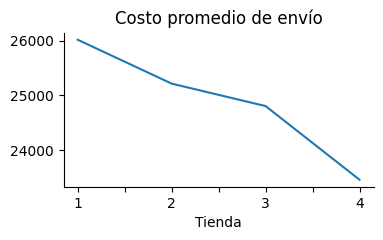

In [54]:
from matplotlib import pyplot as plt
envio_promedio['Costo de envío'].plot(kind='line', layout=(7,4), figsize=(4,2), title='Costo promedio de envío')
plt.gca().spines[['top', 'right']].set_visible(False)